# Spring 2019 CX4240 Homework 3

## Dr. Mahdi Roozbahani

## Deadline: Tuesday July 2, 2019, 11:59 pm

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged, but each student must write his own answers and explicitly mention any collaborators.

# Part 1 Descriptive Questions (50pts)

* Please see the attached PDF and word document and submit your results as either a PDF or word document.

# Part 2: Programming (50pts)

## 3 Principal Component Analysis (25pts)


### Environment Setup

In [1]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_boston, load_diabetes, load_digits, load_breast_cancer
from keras.datasets import mnist
%matplotlib inline

Using TensorFlow backend.


## Load images data and plot
We load the dataset we will deal with, and show the image

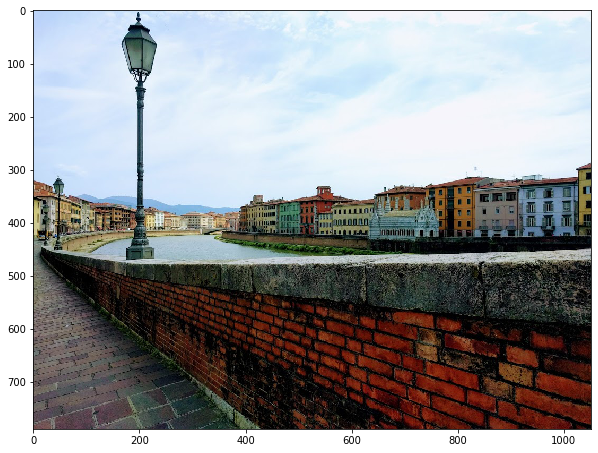

In [2]:
image = plt.imread("hw_3_img.jpg")/255.
fig = plt.figure(figsize=(10,10))
plt.imshow(image)

We can transfer the image to grayscale as follows:

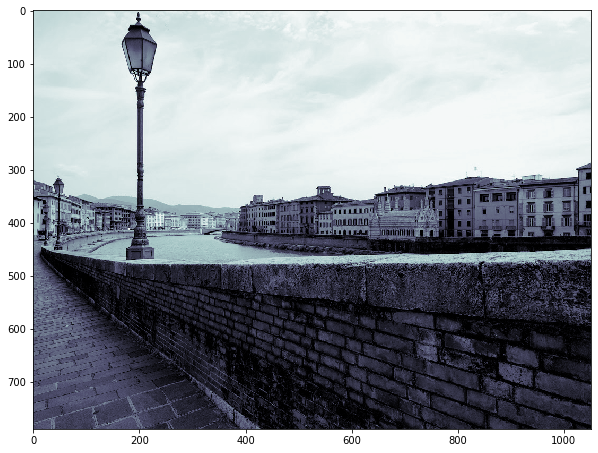

In [3]:
def rgb2gray(rgb):   
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

fig = plt.figure(figsize=(10, 10))
# plot several images
plt.imshow(rgb2gray(image), cmap=plt.cm.bone)

### Image compression

The SVD allows us to compress an image by throwing away the least important information.  The greater the singular values -> the great the variance -> most information from the corresponding singular vector.

SVD each matrix and get rid of the small singular values to compress the image. The loss of inforamtion is negligible as the difference is very difficult to be spotted. 

[Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)(PCA) follows the same process to elimate the small variance eigenvalues and their vectors.  With PCA, we center the data first by subtracting the mean.

Each singular value tells us how much of the variance of a matrix (e.g. image) is captured in each component.  For example, the variance captured by the first component is $$\frac{\sigma_1}{\sum_{i=1}^n \sigma_i}$$ where $\sigma_i$ is the $i^{th}$ singular value.

You need to finish the following functions to do SVD and then reconstruct the image by components.

In [4]:
def svd(X):
    """
    Do SVD. You could use numpy SVD.
    Your function should be able to handle black and white 
    images (M*N arrays) as well as color images (M*N*3 arrays)
    Args: 
        X: M * N array corresponding to an image (M*N*3 if color image)
    Return:
        U: M*M (*3 for color images) 
        S: min(M, N)*1 (*3 for color images)
        V: N*N (*3 for color images)
        
        
    """
    if len(X.shape) > 2:
        U, S, V = [], [], []
        for i in range(3):
            u, s, v = np.linalg.svd(X[:, :, i])
            U.append(u)
            S.append(s)
            V.append(v)
        U = np.stack(U, axis=-1)
        S = np.stack(S, axis=-1)
        V = np.stack(V, axis=-1)
    else:
        U, S, V = np.linalg.svd(X)
    return U, S, V

def rebuildsvd(U, S, V, k):
    """
    Rebuild SVD by k componments.
    Args: 
        U: M*M (*3 for color images) 
        S: min(M, N)*1 (*3 for color images)
        V: N*N (*3 for color images)  
        k: int corresponding to number of components
    Return:
        Xrebuild: M*N array of reconstructed image (M*N*3 if color image)
        
    Hint: numpy.matmul may be helpful for reconstructing color images
    """
    if len(U.shape) > 2:
        Xrebuild = np.stack([U[:, :k, i] * S[:k,i] @ V [:k, :, i] for i in range(3)], axis=-1)
    else:
        Xrebuild = U[:,:k] * S[:k] @ V[:k,:]
    return Xrebuild

def compression_ratio(X, k):
    """
    Compute compression of an image: (num stored values in original)/(num stored values in compressed)
    Args: 
        X: M * N array corresponding to an image (M*N*3 if color image)
        k: int corresponding to number of components
    Return:
        compression_ratio: float of proportion of storage used by compressed image
    """
    m = X.shape[0]
    n = X.shape[1]
    compression_ratio = (k*(m+n+1))/(m*n)
    return compression_ratio

def recovered_variance_proportion(S, k):
    """
    Compute the proportion of the variance in the original matrix recovered by a rank-k approximation
    
    Args:
       S: min(M, N)*1 (*3 for color images) of singular values for the image
       k: int, rank of approximation
    Return:
       recovered_var: int (array of 3 ints for color image) corresponding to proportion of recovered variance
    """
    if len(S.shape) > 1:
        recovered_var = S[:k].sum(axis=0)/S.sum(axis=0)
    else:
        recovered_var = S[:k].sum()/S.sum()
    return recovered_var

**Now let see the results for image reconstruction.**  
Black and White

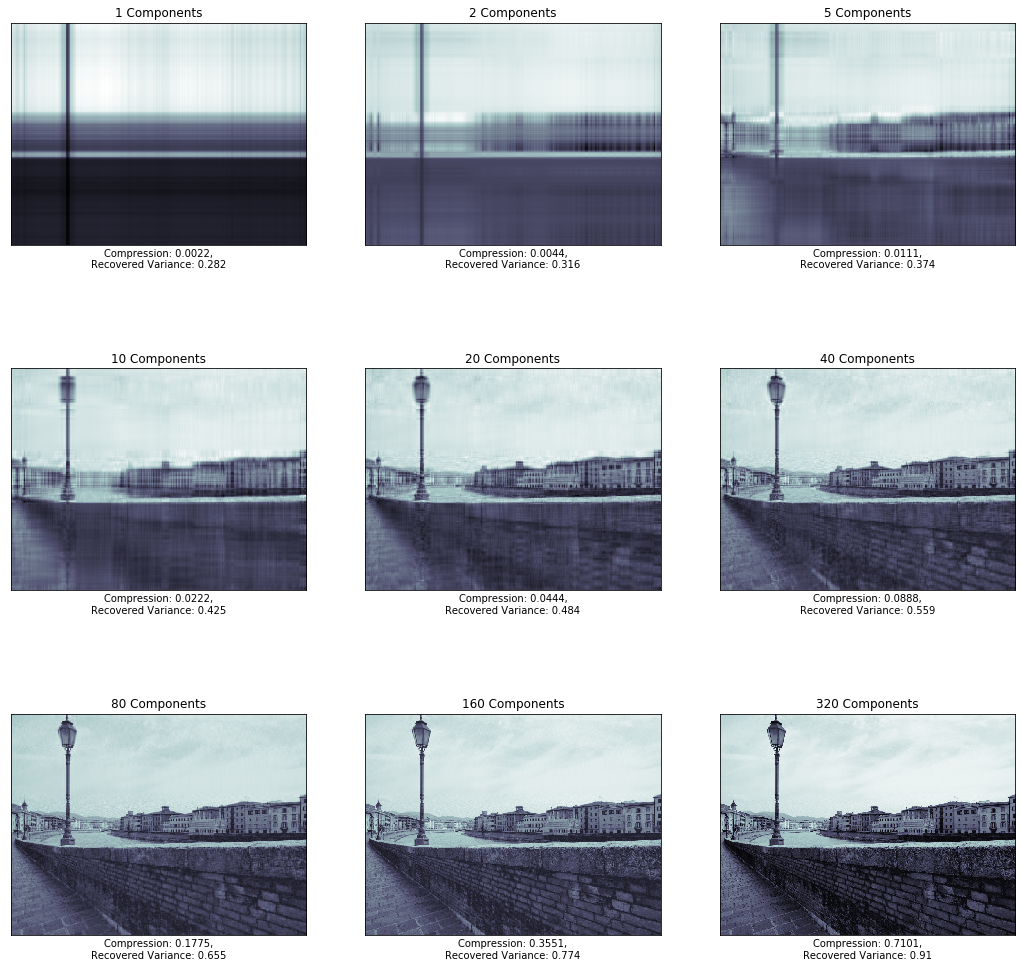

In [5]:
bw_image = rgb2gray(image)
U, S, V = svd(bw_image)
component_num = [1,2,5,10,20,40,80,160,320]

fig = plt.figure(figsize=(18, 18))

# plot several images
i=0
for k in component_num:
    img_rebuild = rebuildsvd(U, S, V, k)
    c = np.around(compression_ratio(image, k), 4)
    r = np.around(recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild, cmap=plt.cm.bone)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {c},\nRecovered Variance: {r}")
    i = i+1

Color

W0702 15:03:44.049894 140734867105216 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 15:03:44.126101 140734867105216 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 15:03:44.255529 140734867105216 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 15:03:44.347691 140734867105216 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 15:03:44.470515 140734867105216 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 15:03:44.668047 140734867105216 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0702 15:03:45.238753 140734

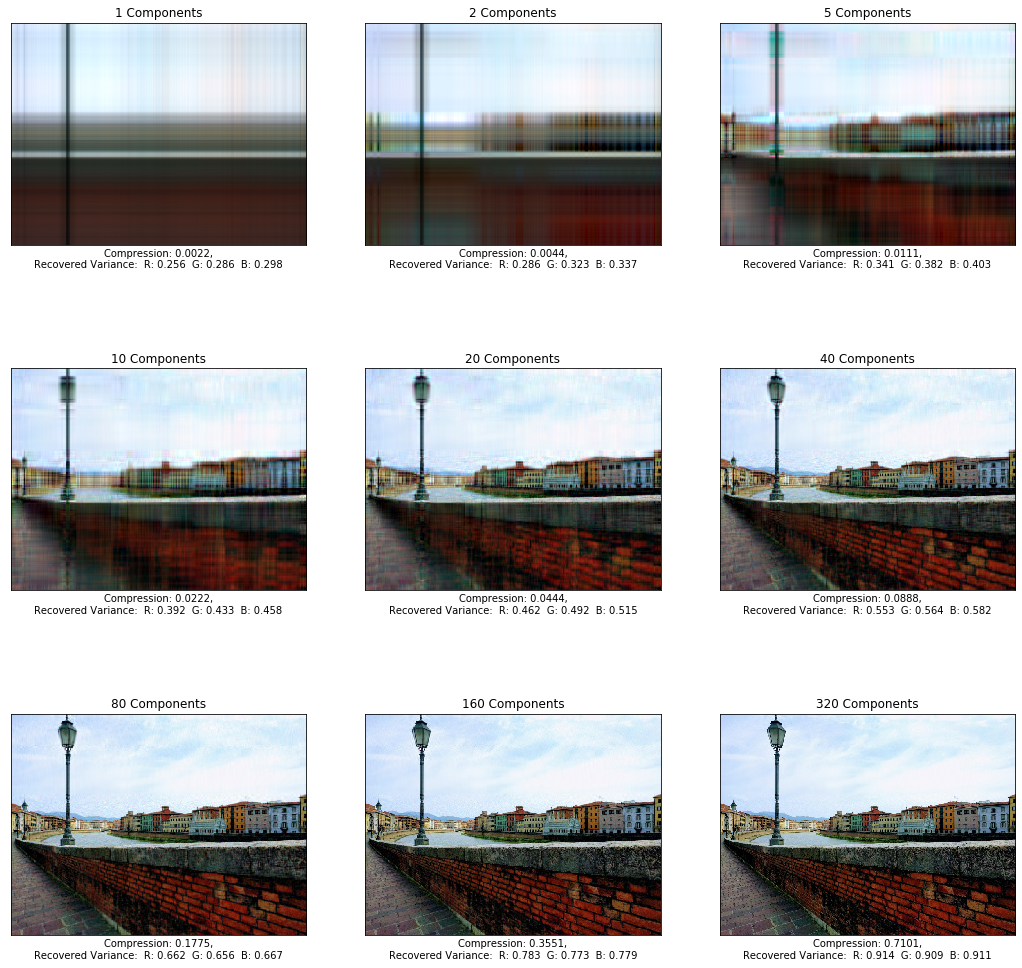

In [6]:
U, S, V = svd(image)
component_num = [1,2,5,10,20,40,80,160,320]

fig = plt.figure(figsize=(18, 18))

# plot several images
i=0
for k in component_num:
    img_rebuild = rebuildsvd(U, S, V, k)
    c = np.around(compression_ratio(image, k), 4)
    r = np.around(recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {np.around(c,4)},\nRecovered Variance:  R: {r[0]}  G: {r[1]}  B: {r[2]}")
    i = i+1

## 4 Polynomial Regression with Regualrization (25pts)

In [7]:
def rmse(pred, label): # This is the root mean square error (use the first equation here)
    return np.sqrt(np.mean((pred - label) ** 2))

# Hint: get the sqaure root of theta hat in slide 14 (https://mahdi-roozbahani.github.io/cse4240-spring2019.github.io/course/14-linear-regression.pdf)
prediction = np.array([1, 2, 3]) 
label = np.array([1.5, 2.5, 3.5])
print('rmse =',rmse(prediction, label))

rmse = 0.5


In [8]:
def construct_polynomial_feats(x, degree):
    return np.power(x[:, None], np.arange(degree+1)[None, :])
    """
    Args:
        x: numpy array of length N, the 1-D observations
        degree: the max polynomial degree
    Return:
        feat: numpy array of shape Nx(degree+1), remember to include 
        the bias term. feat is in the format of:
        [[1.0, x1, x1^2, x1^3, ....,],
         [1.0, x2, x2^2, x2^3, ....,],
         ......
        ]
    """

# Here there are two data points one data point is 0.5 and other one is 0.2. We try to represent these two data points
# in higher dimensions
x = np.array([0.5, 0.2]) 
x_feat = construct_polynomial_feats(x, 4)
print(x_feat)

[[1.     0.5    0.25   0.125  0.0625]
 [1.     0.2    0.04   0.008  0.0016]]


In [9]:
def plot_curve(x, y, curve_type='.', color='b', lw=2):
    plt.plot(x, y, curve_type, color=color, linewidth=lw)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

In [10]:
class LinearReg(object):
    @staticmethod 
    # static method means that you can use this method or function for any other classes, it is not specific to LinearReg
    def fit(xtrain, ytrain):
        return (np.linalg.inv(xtrain.T @ xtrain)) @ xtrain.T @ ytrain
        """
        Args:
            xtrain: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            ytarin: Nx1 numpy array, the true labels
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """

    @staticmethod
    def predict(xtest, weight):
        return xtest @ weight
        """
        Args:
            xtest: NxD numpy array, where N is number 
                   of instances and D is the dimensionality of each 
                   instance
            weight: Dx1 numpy array, the weights of linear regression model
        Return:
            prediction: Nx1 numpy array, the predicted labels
        """
        raise NotImplementedError
# Hint: in the fit function, use close form solution of the linear regression to get weights. 
# For inverse, you can use numpy linear algebra function  
# For the predict, you need to use linear combination of data points and their weights (y = w0*1+w1*X1+...)

Let's first construct a dataset for polynomial regression.

In this case, we construct the polynomial features up to degree 5, where the groundtruth function is just a linear function (i.e., only require polynomial features up to degree 1).

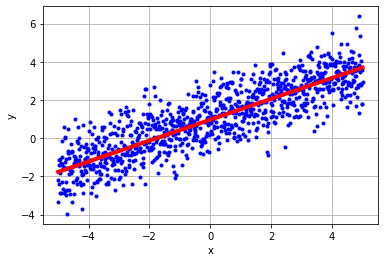

In [11]:
POLY_DEGREE = 5
NUM_OBS = 1000

rng = np.random.RandomState(seed=4)

true_weight = rng.rand(POLY_DEGREE + 1, 1)
true_weight[2:, :] = 0
x_all = np.linspace(-5, 5, NUM_OBS)
x_all_feat = construct_polynomial_feats(x_all, POLY_DEGREE)
y_all = np.dot(x_all_feat, true_weight) + rng.randn(x_all_feat.shape[0], 1) # in the second term, we add noise to data
# Note that here we try to produce y_all as our training data
plot_curve(x_all, y_all) # Data with noise that we are going to predict
plot_curve(x_all, np.dot(x_all_feat, true_weight), curve_type='-', color='r', lw=4) # the groundtruth information

indices = rng.permutation(NUM_OBS)

In the figure above, the red curve is the true fuction we want to learn, while the blue dots are the noisy observations. The observations are generated by $Y = XW + \sigma$, where $\sigma \sim \mathcal{N}(0, 1)$ are i.i.d. generated noise. 

Now let's split the data into two parts, namely the training set and test set. The red dots are for training, while the blue dots are for testing.

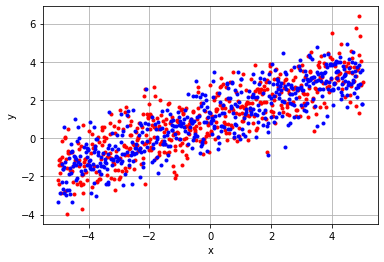

In [12]:
train_indices = indices[:NUM_OBS//2]
test_indices = indices[NUM_OBS//2:]

plot_curve(x_all[train_indices], y_all[train_indices], color='r')
plot_curve(x_all[test_indices], y_all[test_indices], color='b')

Now let's first train using the entire training set, and see how we performs on the test set and how the learned function look like.

In [13]:
weight = LinearReg.fit(x_all_feat[train_indices], y_all[train_indices])
y_test_pred = LinearReg.predict(x_all_feat[test_indices], weight)
test_rmse = rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

test rmse: 0.9222


And what if we just use the first 10 observations to train? 

In [14]:
sub_train = train_indices[:10]
weight = LinearReg.fit(x_all_feat[sub_train], y_all[sub_train])
y_test_pred = LinearReg.predict(x_all_feat[test_indices], weight)
test_rmse = rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

test rmse: 2.1910


Did you see a worse performance? Let's take a closer look at what we have learned.

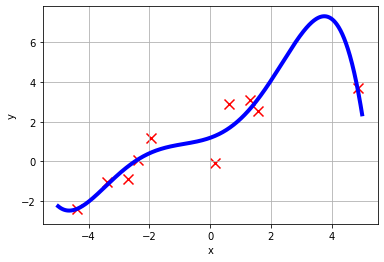

In [15]:
y_pred = LinearReg.predict(x_all_feat, weight)
plot_curve(x_all, y_pred, curve_type='-', color='b', lw=4)
plt.scatter(x_all[sub_train], y_all[sub_train], s=100, c='r', marker='x')

y_test_pred = LinearReg.predict(x_all_feat[test_indices], weight)

Now let's try Ridge Regression

In [16]:
class RidgeReg(LinearReg):

    @staticmethod
    def fit(xtrain, ytrain, c_lambda):
        lambdaI = c_lambda * np.identity(xtrain.shape[1],dtype=np.float)
        lambdaI[0,0] = 0.0
        return np.linalg.inv(xtrain.T @ xtrain + (lambdaI)) @ xtrain.T @ ytrain
#        

test rmse: 1.2115


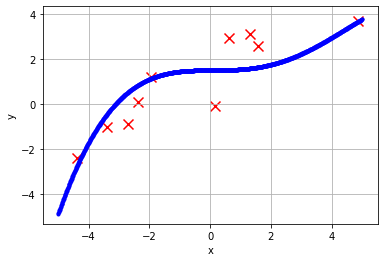

In [17]:
sub_train = train_indices[:10]
weight = RidgeReg.fit(x_all_feat[sub_train], y_all[sub_train], c_lambda=1000)

y_pred = RidgeReg.predict(x_all_feat, weight)
plot_curve(x_all, y_pred)
plt.scatter(x_all[sub_train], y_all[sub_train], s=100, c='r', marker='x')

y_test_pred = RidgeReg.predict(x_all_feat[test_indices], weight)
test_rmse = rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

In [18]:
# Let's use Cross Validation to find what can be the best value for the c_lambda. 
# We provided 6 possible values for lambda, and you will use them in cross validation.
# For cross validation, use 10-fold method and only use it for your training data (you already have the train_indices to get training data).
# For the tarining data, split them in 10 folds which means that use 10 percent of training data for test and 90 percent for training.
# At the end for each lambda, you have caluclated 10 rmse and get the mean value of that.
# That's it. Pick up the lambda with the lowest mean value of rmse. 
def cross_validation(X, y, kfold, c_lambda):
    N, D = X.shape[0], X[0].shape[0]
    errors = np.empty(kfold)
    scale = N //kfold
    Z = np.concatenate((X, y), axis=-1)
    np.random.shuffle(Z)
    X, y = Z[:,:-1], Z[:,-1]
    Xsplit = np.array(np.split(X, kfold))
    Ysplit = np.array(np.split(y, kfold))
    for k in range(kfold):
        Xtrain, Ytrain = Xsplit[:,k,:], Ysplit[:,k]
        Xtest = np.concatenate(np.delete(Xsplit, k, axis=1), axis=0)
        Ytest = np.concatenate(np.delete(Ysplit, k, axis=1), axis=0)
        weight = RidgeReg.fit(Xtrain, Ytrain, c_lambda)
        pred = RidgeReg.predict(Xtest, weight)
        errors[k] = rmse(pred, Ytest)
    return np.mean(errors)


best_lambda = None
best_error = None
kfold = 10
lambda_list = [0, 0.1, 1, 5, 10, 100, 1000]
for lm in lambda_list:
    err = cross_validation(x_all_feat[train_indices], y_all[train_indices], kfold, lm)
    print('lambda: %.2f' % lm, 'error: %.6f'% err)
    if best_error is None or err < best_error:
        best_error = err
        best_lambda = lm

print('best_lambda: %.2f' % best_lambda)
weight = RidgeReg.fit(x_all_feat[train_indices], y_all[train_indices], c_lambda=best_lambda)
y_test_pred = RidgeReg.predict(x_all_feat[test_indices], weight)
test_rmse = rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

lambda: 0.00 error: 5.867190
lambda: 0.10 error: 6.780547
lambda: 1.00 error: 4.655234
lambda: 5.00 error: 2.985177
lambda: 10.00 error: 1.841966
lambda: 100.00 error: 4.020731
lambda: 1000.00 error: 2.497845
best_lambda: 10.00
test rmse: 0.9227


## 5 Combining PCA and Linear Regression (25 pts)







In this problem, we will investigate how PCA can be used to improve features for regression and classification tasks and how the data itself affects the behavior of PCA.  

**Intrinsic Dimensionality**  
Assume a dataset is composed of N datapoints, each of which has D features with D < N.  The *dimension* of our data would b $D$, since our points live in an M-dimensional space.  It is possible, however, that many of these dimensions contain redundant information.  The *intrinsic dimensionality* is the number of dimensions we need to reconstruct our data with high fidelity.  For our purposes, we will define the intrinsic dimension as the number of principal components needed to reconstruct 99% of the variation within our data.  

We define a set of features as linearly independent if we cannot construct one out of a linear combination of the others.  The number of linearly independent features is the number of nonzero principal components (where we define 0 is anything less than $10^{-11}$ due to floating point error).

In [19]:
def pca(X):
    cX = X - np.mean(X, axis=0)[None,:]
    return svd(X)
    """
    Decompose dataset into principal components. 
    You may use your SVD function from the previous part in your implementation.
    
    Args: 
        X: N*M array corresponding to a dataset
    Return:
        U: N*N 
        S: min(M, N)*1 
        V: D*D
    """

    
def intrinsic_dimension(S, recovered_variance=.99):
    T = np.sum(S)
    dim = 0
    recovered = 0.0
    while recovered < T * recovered_variance:
        recovered += S[dim]
        dim += 1
    return dim
    """
    Find the number of principal components necessary to recover given proportion of variance
    
    Args: 
        S: 1-d array corresponding to the singular values of a dataset
        
        recovered_varaiance: float in [0,1].  Minimum amount of variance 
            to recover from given principal components
    Return:
        dim: int, the number of principal components necessary to recover 
            the given proportion of the variance
    """
    
def num_linearly_ind_features(S, eps=1e-11):
    N = S.shape[0]
    dim = 0
    recovered = 100.0 * (eps + 1.0)
    while recovered > eps:
        recovered = S[dim]
        dim += 1
        if dim == N:
            recovered = -1.0
    return dim
    """
    Find the number of linearly independent featues in dataset
    
    Args: 
        S: 1-d array corresponding to the singular values of a dataset
    Return:
        dim: int, the number of linearly independent dimensions in our data
    """


Use your above functions to find the intrinsic dimensionality and number of linearly independent components in the following datasets:
* Digits (handwritten digits)
* Breast Cancer
* Boston Housing
* Diabetes

In [20]:
digits = load_digits()
cancer = load_breast_cancer()
boston = load_boston()
diabetes = load_diabetes()
#(_, _), (mnist_data, mnist_labels) = mnist.load_data()
#mnist_data = mnist_data.reshape(mnist_data.shape[0],-1)

In [21]:
print("Total Features")
print("\tDigits", digits.data.shape[1])
print("\tBreast Cancer", cancer.data.shape[1])
print('\tBoston', boston.data.shape[1])
print('\tDiabetes', diabetes.data.shape[1])
#print('\tMNIST', mnist_data.shape[1])

Total Features
	Digits 64
	Breast Cancer 30
	Boston 13
	Diabetes 10


In [22]:
print("Linearly Independent Features:")
print("\tDigits", num_linearly_ind_features(pca(digits.data)[1]))
print("\tBreast Cancer", num_linearly_ind_features(pca(cancer.data)[1]))
print("\tBoston", num_linearly_ind_features(pca(boston.data)[1]))
print("\tDiabetes", num_linearly_ind_features(pca(diabetes.data)[1]))
#print("\tMNIST", num_linearly_ind_features(pca(mnist_data)[1]))

Linearly Independent Features:
	Digits 62
	Breast Cancer 30
	Boston 13
	Diabetes 10


In [23]:
print("Intrinsic Dimensionality:")
print("\tDigits", intrinsic_dimension(pca(digits.data)[1]))
print("\tBreast Cancer", intrinsic_dimension(pca(cancer.data)[1]))
print("\tBoston", intrinsic_dimension(pca(boston.data)[1]))
print("\tDiabetes", intrinsic_dimension(pca(diabetes.data)[1]))
#print("\tMNIST", intrinsic_dimension(pca(mnist_data)[1]))

Intrinsic Dimensionality:
	Digits 50
	Breast Cancer 4
	Boston 8
	Diabetes 10


**Feature Scaling**
Principal component analysis is not agnostic to the scale of your features.  Measuring a feature with different units can change your principal components.

For this problem, randomly choose one of your a column in each of the above datasets and multiply it by 1000.  For each of the datasets, answer the following:
1. How does this change the distribution of variance among the first 10 components?  
2. How does this change the first principal component of the data?
3. How does this affect the number of linearly independent components and intrinsic dimensionality?  Why?

It may be helpful to plot the variance captured by each component in a scree plot (see function below) and to make a bar plot of the absolute value of each feature in the first principal component.  

	Boston number of features 13
	Boston linearly independent features 13
	Boston intrinsic dimension 8


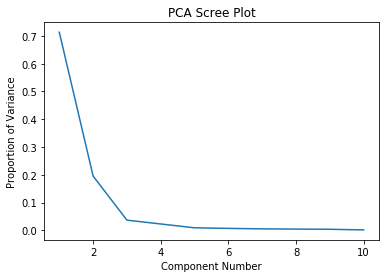

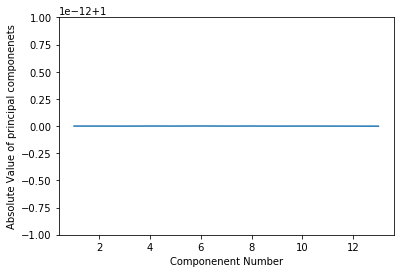

	Boston number of features 13
	Boston linearly independent features 13
	Boston intrinsic dimension 4


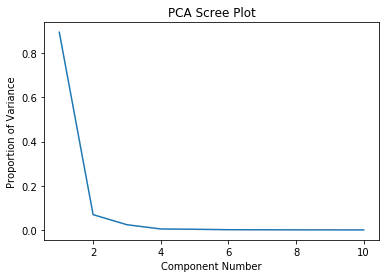

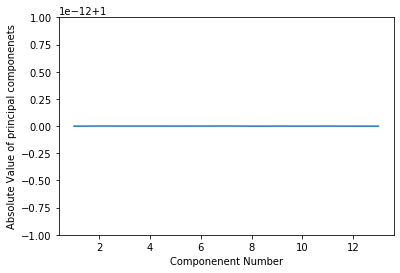

In [24]:
def randomly_perturb_data(data, multiplier=1000):
    D = data.shape[1]
    choice = np.random.randint(D)
    mList = [1.0] * D
    mList[choice] = multiplier
    return data * np.array(mList)[None, :]
    """
    Multiply a random column in data by multiplier
    
    Inputs:
        data: N*D numpy array of features
        multiplier: multiplier by which to perturb a random column in data
        
    Returns:
        perturbed_data: Data with random column multiplied by multiplier
    """
    
def scree_plot(S, n_components=10):
    """
    Plot proportion of variance contained in each individual component
    """
    plt.plot(range(1, n_components+1), (S/S.sum())[:n_components])
    plt.ylabel("Proportion of Variance")
    plt.xlabel("Component Number")
    plt.title("PCA Scree Plot")
    plt.show()
    
def plot_component_vector(V):
    D = V.shape[1]
    Vabs = np.sqrt(np.sum(V * V, axis=0))
    plt.plot(range(1, D+1),  Vabs)
    plt.ylabel("Absolute Value of principal componenets")
    plt.xlabel("Componenent Number")
    plt.show()
    """
    Plot the absolute value of the first principal component 
    This should be the first row or column of the V matrix returned by 
    your PCA function above (depending on how you defined your outputs)
    
    Inputs:
        V: Matrix of principal components
    """
data = boston.data
print('\tBoston number of features', data.shape[1])
print("\tBoston linearly independent features", num_linearly_ind_features(pca(data)[1]))
print("\tBoston intrinsic dimension", intrinsic_dimension(pca(data)[1]))
scree_plot(pca(data)[1])
plot_component_vector(pca(data)[2])
data2 = randomly_perturb_data(boston.data)
print('\tBoston number of features', data2.shape[1])
print("\tBoston linearly independent features", num_linearly_ind_features(pca(data2)[1]))
print("\tBoston intrinsic dimension", intrinsic_dimension(pca(data2)[1]))
scree_plot(pca(data2)[1])
plot_component_vector(pca(data2)[2])


After completing an analysis of the priciniple componets of each data set, the initial boston data set, as well as the perturbed data set:
The variance becomes heavily dependent on the first component, i.e. the first componenet contains a much larger proportion of variance after data has been perturbed. This fits expectation as the perturbation with a multiplier of 1000 heavily skews the data set allong that axis, thus the principle direction of variance becomes roughly the basis vector for that column, with a large variance. 

The absolut value of principle component vectors is unchanged as all of these vectors are normalized unit vectors.

The number of linearly independent components is unchanged, as the column span of the matrix is unchanged during perturbation, if the kth row is multipled by 1000, then in the corresponding coeffecients that make any vector in the column span of the unperturbed matrix, if we divide the kth coeffecient (c_k) by 1000, it corresponds to the same vector, in the column span of the perturbed matrix:

$M$ a matrix $N \times D$  <br>
$\forall v \in colspan(M):$ <br>
$\exists c_1, c_2, ... c_D:  c_1M_1 + c_2M_2 + ... c_DM_D = v$ <br>
$P = M_1, M_2, ..., 1000M_k, ..., M_D$ <br>
$c_1P_1 + ... + (c_k / 1000)M_k + ... +  c_DM_D = v$ <br>
thus $\forall v \in colspan(M), v\in colspan(P)$

Lastly because the proportion of variance is so much greater in the first componenet of the perturbed matrix, the recovered proportion of variance is reached much faster, greatly reducing the number of intrinsic dimensions.